In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [31]:
import os


In [32]:
data = pd.read_csv('/content/milknew.csv')

In [66]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,38.0,1,0,1,0,254.0,0
1,6.6,38.0,0,1,0,1,253.0,0
2,6.8,45.0,1,1,1,1,250.0,1
3,6.8,38.0,1,1,0,1,255.0,1
4,6.6,38.0,0,0,0,0,255.0,2


# **ANALYSING THE DATA**

In [33]:
data.shape

(1059, 8)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


In [36]:
data['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [37]:
data.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


<Axes: >

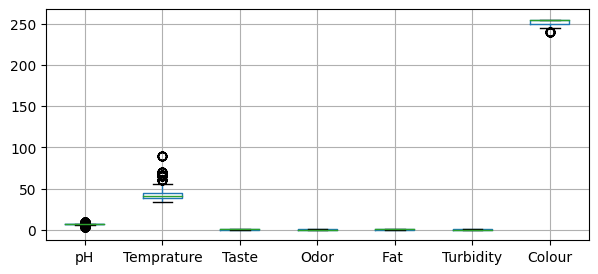

In [38]:
plt.figure(figsize=(7,3))
data.boxplot()

In [39]:
# Select only numerical columns before calculating skew.
numerical_data = data.select_dtypes(include=['number'])
numerical_data.skew()

,0
pH,-0.683904
Temprature,2.216739
Taste,-0.188058
Odor,0.272949
Fat,-0.730799
Turbidity,0.035940
Colour,-1.024902


In [40]:
quantile1=data["Temprature"].quantile(0.25)
quantile2=data["Temprature"].quantile(0.75)

data["Temprature"]=np.where(data["Temprature"]<quantile1,quantile1,data["Temprature"])
data["Temprature"]=np.where(data["Temprature"]>quantile2,quantile2,data["Temprature"])

In [29]:
t = round(data["Temprature"].skew(),10)
print(t)

0.0129903439
0.0129903439


In [41]:
quantile1=data["Colour"].quantile(0.25)
quantile2=data["Colour"].quantile(0.75)

data["Colour"]=np.where(data["Colour"]<quantile1,quantile1,data["Colour"])
data["Colour"]=np.where(data["Colour"]>quantile2,quantile2,data["Colour"])

In [42]:
t = round(data["Colour"].skew(),10)
print(t)

-0.4402211375


In [44]:
quantile1=data["pH"].quantile(0.25)
quantile2=data["pH"].quantile(0.75)

data["pH"]=np.where(data["pH"]<quantile1,quantile1,data["pH"])
data["pH"]=np.where(data["pH"]>quantile2,quantile2,data["pH"])

In [45]:
t = round(data["pH"].skew(),10)
print(t)

-0.1071831836


<Axes: xlabel='Grade', ylabel='Count'>

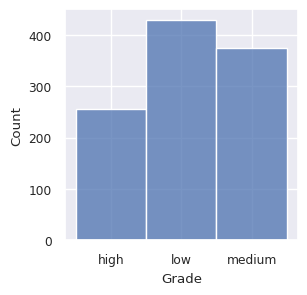

In [46]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=data, x='Grade')

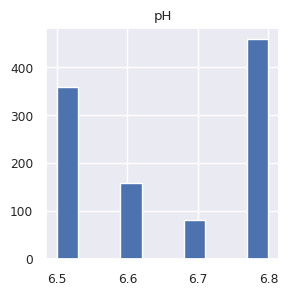

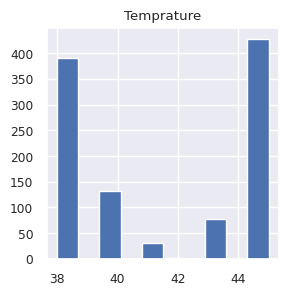

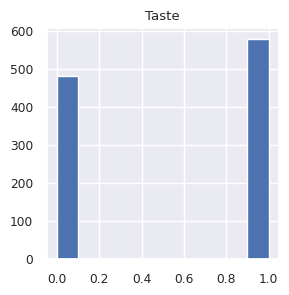

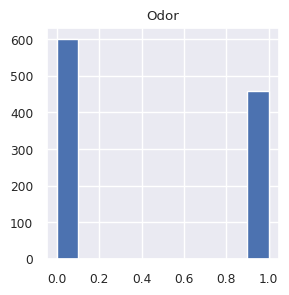

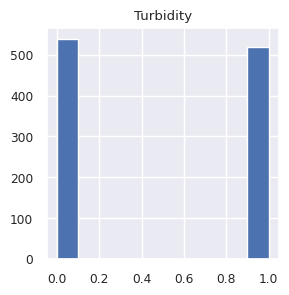

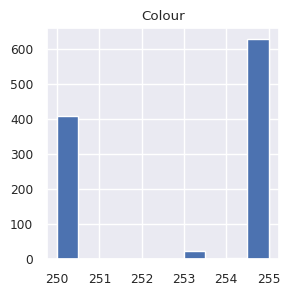

In [48]:
column=['pH','Temprature','Taste','Odor','Turbidity','Colour']
for category in column:
  plt.figure(figsize=(3,3))
  plt.hist(data[category])
  plt.title(category)
  plt.show()

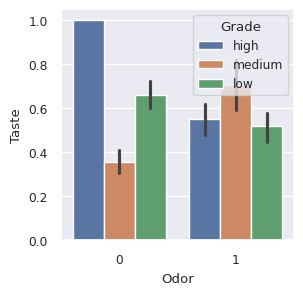

In [54]:


plt.figure(figsize=(3,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=data)
plt.show()



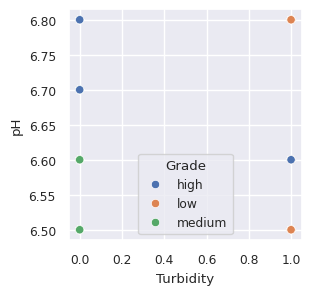

In [55]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Turbidity', y='pH',hue='Grade',data=data)
plt.show()

In [56]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

In [57]:


from sklearn.model_selection import train_test_split
X=data.drop(['Grade'],axis=1)
y=data['Grade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)



# decision ttree

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
y_pred=model.predict(X_test)
y_pred.shape

(318,)

In [60]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9088050314465409

In [64]:
import pickle

# Assuming 'model' is your trained DecisionTreeClassifier
filename = 'milk_quality_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [67]:
import pickle
import numpy as np

# Load the trained model
filename = 'milk_quality_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

# Define the feature input function
def get_milk_quality_prediction():
    # Prompt the user for input on each milk quality feature
    pH = float(input("Enter pH level: "))
    temperature = int(input("Enter Temperature (°C): "))
    taste = int(input("Enter Taste (0 for bad, 1 for good): "))
    odor = int(input("Enter Odor (0 for bad, 1 for good): "))
    fat = int(input("Enter Fat Content (%): "))
    turbidity = int(input("Enter Turbidity (0 for low, 1 for high): "))
    colour = int(input("Enter Colour (0 for light, 1 for dark): "))

    # Create a feature array based on input values
    features = np.array([[pH, temperature, taste, odor, fat, turbidity, colour]])

    # Predict the milk grade
    prediction = model.predict(features)

    # Display the result
    print(f"Predicted Milk Grade: {prediction[0]}")

# Run the prediction function
get_milk_quality_prediction()


Enter pH level: 3
Enter Temperature (°C): 24
Enter Taste (0 for bad, 1 for good): 1
Enter Odor (0 for bad, 1 for good): 1
Enter Fat Content (%): 78
Enter Turbidity (0 for low, 1 for high): 0
Enter Colour (0 for light, 1 for dark): 0
Predicted Milk Grade: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [68]:
import pickle
import numpy as np
import tkinter as tk
from tkinter import messagebox

# Load the trained model
filename = 'milk_quality_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

# Function to make prediction
def get_milk_quality_prediction():
    try:
        # Gather input values from the user
        pH = float(entry_pH.get())
        temperature = int(entry_temperature.get())
        taste = int(entry_taste.get())
        odor = int(entry_odor.get())
        fat = int(entry_fat.get())
        turbidity = int(entry_turbidity.get())
        colour = int(entry_colour.get())

        # Create feature array
        features = np.array([[pH, temperature, taste, odor, fat, turbidity, colour]])

        # Get prediction
        prediction = model.predict(features)

        # Show the result in a message box
        messagebox.showinfo("Prediction Result", f"Predicted Milk Grade: {prediction[0]}")
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values for all fields.")

# Create GUI window
root = tk.Tk()
root.title("Milk Quality Prediction")
root.geometry("400x400")

# Create input labels and entry boxes
tk.Label(root, text="Enter pH level:").pack()
entry_pH = tk.Entry(root)
entry_pH.pack()

tk.Label(root, text="Enter Temperature (°C):").pack()
entry_temperature = tk.Entry(root)
entry_temperature.pack()

tk.Label(root, text="Enter Taste (0 for bad, 1 for good):").pack()
entry_taste = tk.Entry(root)
entry_taste.pack()

tk.Label(root, text="Enter Odor (0 for bad, 1 for good):").pack()
entry_odor = tk.Entry(root)
entry_odor.pack()

tk.Label(root, text="Enter Fat Content (%):").pack()
entry_fat = tk.Entry(root)
entry_fat.pack()

tk.Label(root, text="Enter Turbidity (0 for low, 1 for high):").pack()
entry_turbidity = tk.Entry(root)
entry_turbidity.pack()

tk.Label(root, text="Enter Colour (0 for light, 1 for dark):").pack()
entry_colour = tk.Entry(root)
entry_colour.pack()

# Prediction button
predict_button = tk.Button(root, text="Predict Milk Grade", command=get_milk_quality_prediction)
predict_button.pack(pady=20)

# Run the GUI loop
root.mainloop()


TclError: no display name and no $DISPLAY environment variable